In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
#!pip install sweetviz
import sweetviz as sv
from seaborn.rcmod import palettes

%matplotlib inline

# Load the data set


In [4]:
df=pd.read_csv('ds_salaries.csv')
 


# Understanding the data

In [5]:
df.head()
#This dataset contains salary information about data science and related jobs.

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [6]:
df.tail()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M
606,606,2022,MI,FT,AI Scientist,200000,USD,200000,IN,100,US,L


In [7]:
df.shape
#The data  has 607 rows and 12 columns. 

(607, 12)

In [8]:
#drop the first column
df.drop(columns=df.columns[0], axis=1, inplace=True)

In [9]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


In [10]:
#Covert country codes into country  names 
!pip install country-converter
import country_converter as coco

In [11]:
df['Company_Location'] = df.company_location.apply(lambda x : coco.convert(names=x, to='name_short', not_found=None))

In [12]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,Company_Location
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,Germany
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,Japan
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,United Kingdom
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S,Honduras
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L,United States


In [13]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size', 'Company_Location'],
      dtype='object')

In [14]:
# how many jobs titles are in this dataset
df['job_title'].unique()  

array(['Data Scientist', 'Machine Learning Scientist',
       'Big Data Engineer', 'Product Data Analyst',
       'Machine Learning Engineer', 'Data Analyst', 'Lead Data Scientist',
       'Business Data Analyst', 'Lead Data Engineer', 'Lead Data Analyst',
       'Data Engineer', 'Data Science Consultant', 'BI Data Analyst',
       'Director of Data Science', 'Research Scientist',
       'Machine Learning Manager', 'Data Engineering Manager',
       'Machine Learning Infrastructure Engineer', 'ML Engineer',
       'AI Scientist', 'Computer Vision Engineer',
       'Principal Data Scientist', 'Data Science Manager', 'Head of Data',
       '3D Computer Vision Researcher', 'Data Analytics Engineer',
       'Applied Data Scientist', 'Marketing Data Analyst',
       'Cloud Data Engineer', 'Financial Data Analyst',
       'Computer Vision Software Engineer',
       'Director of Data Engineering', 'Data Science Engineer',
       'Principal Data Engineer', 'Machine Learning Developer',
       

# Cleaning the dataset 

In [15]:
#check for missing values 
df.isnull().sum()

# They are no null values in this dataset

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
Company_Location      0
dtype: int64

In [16]:
#Deleting the irrelevant features
#continue the analysis on salary in USD only. Hence  remove the Salary and Salary currency columns.
#Also I have converted the country codes into their respective country names and created new columns.
#Hence I will also delete the columns that contain the country codes.


df.drop(['salary','salary_currency', 'company_location'], axis=1, inplace=True)

In [17]:
df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_size,Company_Location
0,2020,MI,FT,Data Scientist,79833,DE,0,L,Germany
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,S,Japan
2,2020,SE,FT,Big Data Engineer,109024,GB,50,M,United Kingdom
3,2020,MI,FT,Product Data Analyst,20000,HN,0,S,Honduras
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,L,United States
...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,US,100,M,United States
603,2022,SE,FT,Data Engineer,126000,US,100,M,United States
604,2022,SE,FT,Data Analyst,129000,US,0,M,United States
605,2022,SE,FT,Data Analyst,150000,US,100,M,United States


In [18]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary_in_usd', 'employee_residence', 'remote_ratio', 'company_size',
       'Company_Location'],
      dtype='object')

In [19]:
columns = ['work_year', 'experience_level','employment_type','job_title','employee_residence','Company_Location','company_size','remote_ratio']

uniques = {col: df[col].unique() for col in columns}
uniques

{'work_year': array([2020, 2021, 2022], dtype=int64),
 'experience_level': array(['MI', 'SE', 'EN', 'EX'], dtype=object),
 'employment_type': array(['FT', 'CT', 'PT', 'FL'], dtype=object),
 'job_title': array(['Data Scientist', 'Machine Learning Scientist',
        'Big Data Engineer', 'Product Data Analyst',
        'Machine Learning Engineer', 'Data Analyst', 'Lead Data Scientist',
        'Business Data Analyst', 'Lead Data Engineer', 'Lead Data Analyst',
        'Data Engineer', 'Data Science Consultant', 'BI Data Analyst',
        'Director of Data Science', 'Research Scientist',
        'Machine Learning Manager', 'Data Engineering Manager',
        'Machine Learning Infrastructure Engineer', 'ML Engineer',
        'AI Scientist', 'Computer Vision Engineer',
        'Principal Data Scientist', 'Data Science Manager', 'Head of Data',
        '3D Computer Vision Researcher', 'Data Analytics Engineer',
        'Applied Data Scientist', 'Marketing Data Analyst',
        'Cloud Data E

In [20]:
#Here, seeing to the unique values it is clear that the work year
#and remote ratio are of int64 datatype. we shall convert these into object datatype.

df["work_year"] = df["work_year"].astype('object')
df["remote_ratio"] = df["remote_ratio"].astype('object')

In [21]:
# For better interpretation and understanding we shall rename the values of the categorical variables.


df.experience_level.replace(['EN','MI','SE', 'EX'], ['Entry', 'Mid', 'Senior', 'Executive'], inplace = True)

df.employment_type.replace(['FT','CT','PT', 'FL'], ['Full Time', 'Contract', 'Part Time', 'Freelance'], inplace = True)

df.company_size.replace(['L','S','M'], ['Large', 'Small', 'Medium'], inplace = True)

In [22]:
df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_size,Company_Location
0,2020,Mid,Full Time,Data Scientist,79833,DE,0,Large,Germany
1,2020,Senior,Full Time,Machine Learning Scientist,260000,JP,0,Small,Japan
2,2020,Senior,Full Time,Big Data Engineer,109024,GB,50,Medium,United Kingdom
3,2020,Mid,Full Time,Product Data Analyst,20000,HN,0,Small,Honduras
4,2020,Senior,Full Time,Machine Learning Engineer,150000,US,50,Large,United States
...,...,...,...,...,...,...,...,...,...
602,2022,Senior,Full Time,Data Engineer,154000,US,100,Medium,United States
603,2022,Senior,Full Time,Data Engineer,126000,US,100,Medium,United States
604,2022,Senior,Full Time,Data Analyst,129000,US,0,Medium,United States
605,2022,Senior,Full Time,Data Analyst,150000,US,100,Medium,United States


In [23]:
#check for duplicates
df[df.duplicated()].shape



(42, 9)

In [24]:
#Remove the 42 duplicate entries in the dataset
df_cleaned=df.drop_duplicates()
df_cleaned

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_size,Company_Location
0,2020,Mid,Full Time,Data Scientist,79833,DE,0,Large,Germany
1,2020,Senior,Full Time,Machine Learning Scientist,260000,JP,0,Small,Japan
2,2020,Senior,Full Time,Big Data Engineer,109024,GB,50,Medium,United Kingdom
3,2020,Mid,Full Time,Product Data Analyst,20000,HN,0,Small,Honduras
4,2020,Senior,Full Time,Machine Learning Engineer,150000,US,50,Large,United States
...,...,...,...,...,...,...,...,...,...
602,2022,Senior,Full Time,Data Engineer,154000,US,100,Medium,United States
603,2022,Senior,Full Time,Data Engineer,126000,US,100,Medium,United States
604,2022,Senior,Full Time,Data Analyst,129000,US,0,Medium,United States
605,2022,Senior,Full Time,Data Analyst,150000,US,100,Medium,United States


In [25]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 565 entries, 0 to 606
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           565 non-null    object
 1   experience_level    565 non-null    object
 2   employment_type     565 non-null    object
 3   job_title           565 non-null    object
 4   salary_in_usd       565 non-null    int64 
 5   employee_residence  565 non-null    object
 6   remote_ratio        565 non-null    object
 7   company_size        565 non-null    object
 8   Company_Location    565 non-null    object
dtypes: int64(1), object(8)
memory usage: 44.1+ KB


In [26]:
sweet_report = sv.analyze(df_cleaned)
#sweet_report.show_html('DS_Salary.html')


Report DS_Salary.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [27]:
#sweet_report.show_notebook(layout='widescreen', w=1500, h=600, scale=0.8)

# Inferences from the EDA REport




Univariate Analysis

1. Work_Year :
Majority of the data is taken for the year 2022, followed by 2021 and 2020

2. experience_level :
Most Data scienetists work at senior level while the least work in entry level.
The personnels with executive level contributes minimum in the dataset.

3. employment_type :
Most data science jobs are full time jobs.

4. job_title :
The top three categories of job type in the dataset is of Data Scientist, Data Engineer and Data Analyst.
Apart from this there are 47 other type of job titles covered in this dataset.

5. Salary_in_usd :
The salary ranges from 2859 USD to 600000 USD, Average salary approximately being 111000 USD.

6. employee_residence :
The personnels from US contributes maximum in the dataset followed by Great Britain.

7. remote_ratio
The data shows most data science related jobs are remote jobs followed by hybrid.

8. company_location :
The maximum personnels in this dataset are working in the offices that are located in US.

9. company_size :
The maximum data in the dataset are of the ones who are working in the medium size companies.






# Relationship Analysis

In [28]:
corelation=df_cleaned.corr()


<AxesSubplot:>

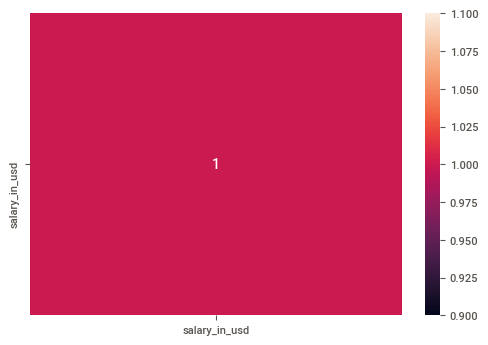

In [31]:
#sns.heatmap(corelation, xticklabels=corelation.columns,yticklabels=corelation.columns, annot=True)

We will plot few other plots becaause this data has more categorical variables.

Scatter plot

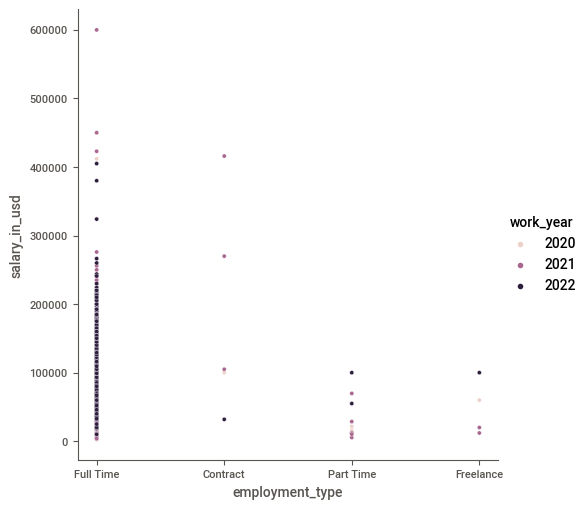

In [30]:
sns.relplot(x='employment_type', y='salary_in_usd',hue='work_year',data=df_cleaned)

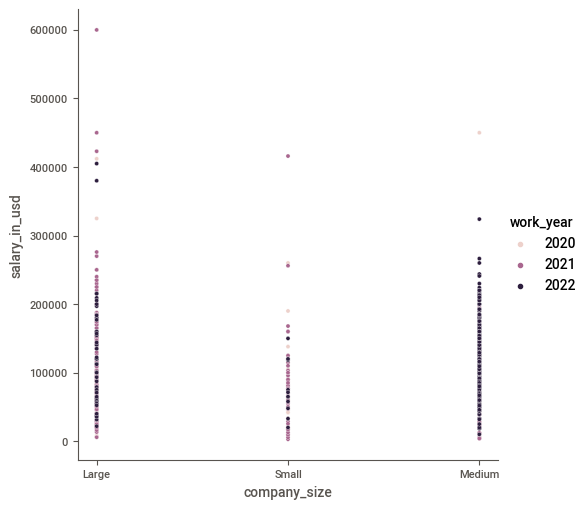

In [33]:
sns.relplot(x='company_size', y='salary_in_usd',hue='work_year',data=df_cleaned)

C:\Users\hanuu\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='salary_in_usd', ylabel='Density'>

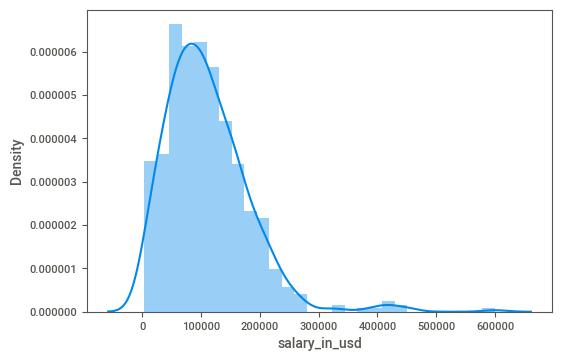

In [34]:
sns.distplot(df_cleaned['salary_in_usd'])

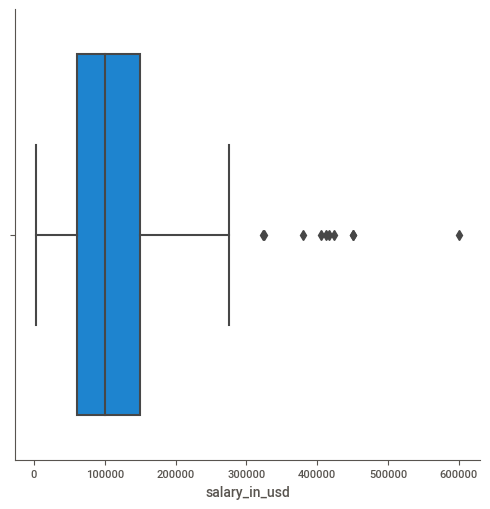

In [38]:
sns.catplot(x='salary_in_usd',kind='box',data=df_cleaned)